# Project Template

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix

C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
attributes_names = ["sepal length(cm)", "sepal width(cm)", "petal length(cm)", "petal width(cm)", "class"]
df = pd.read_csv("iris_dataset.txt", names = attributes_names)

In [3]:
list(df['class'].unique())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

In a classification problem we are trying to predict a discrete number of labels (Y) given our features (X). So in our dataset:
Features X = {sepal length(cm), sepal width(cm), petal length(cm), petal width(cm)}.
Labels Y = {Iris-setosa, Iris-versicolor, Iris-virginica}.
We are going to predict the labels through our features.

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

In [4]:
print (df.shape)

(150, 5)


We could see 150 instances and 5 features.

In [5]:
df.head(10)

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.describe()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can observe the min value of petal width is 0.1 while the max is 2.5. In general the values are between 1 and 7.9.

In [7]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

We can see that each class has the same number of instances

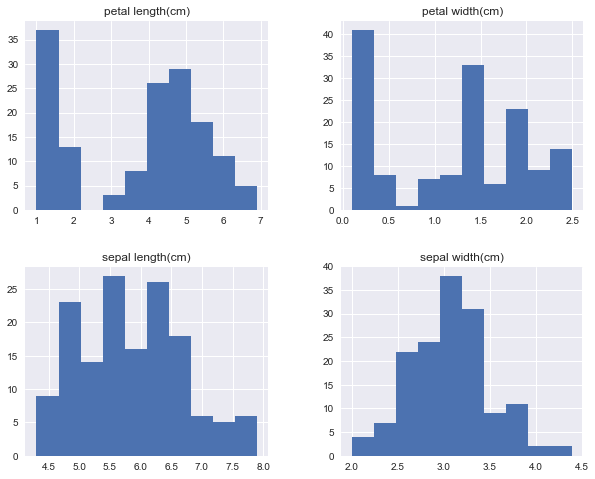

In [8]:
df.hist(figsize = (10, 8))
plt.show()

Histograms groups data into bins and provide us a count of the number of observations in each bin. From the shape of the bins we can quickly get a feeling for whether an attribute is Gaussian, skewed or has an exponential distribution.

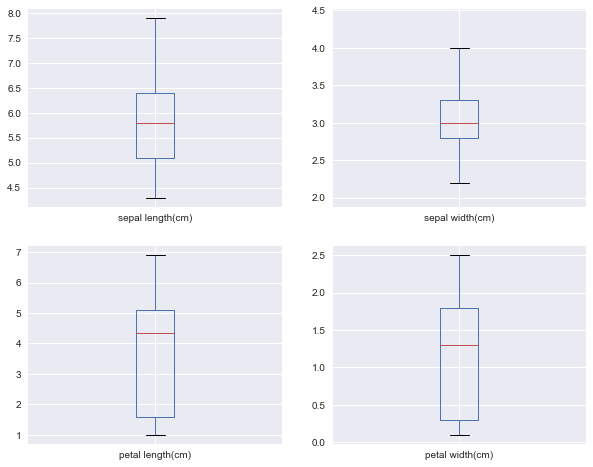

In [9]:
df.plot(kind = 'box', figsize = (10,8), subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data). Also we can observe some outliers in sepal width attribute.

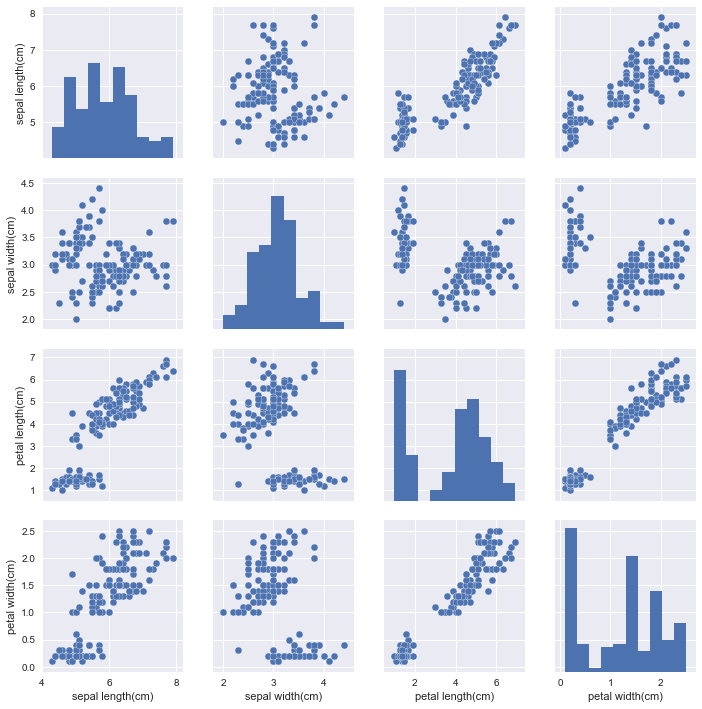

In [10]:
sns.pairplot(df)

In [11]:
corr = df.corr()

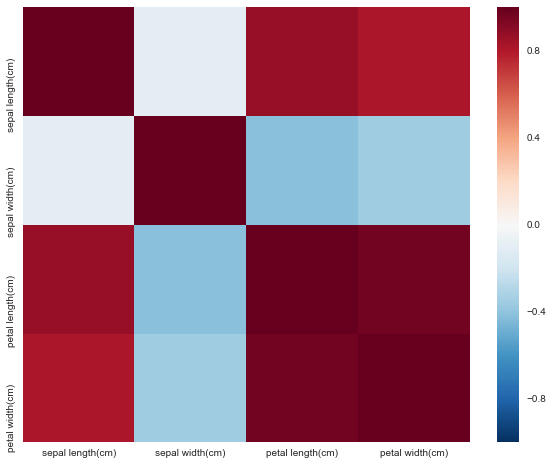

In [12]:
plt.figure(figsize = (10,8))
sns.heatmap(corr)

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

In [13]:
df.isnull().any()

sepal length(cm)    False
sepal width(cm)     False
petal length(cm)    False
petal width(cm)     False
class               False
dtype: bool

We have not missing values in our dataset

## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

In [14]:
class_mapping = {label:idx for idx,label in enumerate (np.unique(df["class"]))}

In [15]:
class_mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [16]:
df["class"] = df["class"].map(class_mapping)

In [17]:
df.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


It is considered good practise to provide class labels as integer arrays to avoid technical glitches. 

## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

In [18]:
array = df.values
X = array[:, 0:4]
Y = array[:, 4]
kfold = KFold(n_splits=10, random_state=7)

In [19]:
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC()))

In [20]:
# The scoring function to use
scoring = 'accuracy'

In [21]:
results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

 LR: 0.880000 (+/- 0.148474)
LDA: 0.966667 (+/- 0.061464)
kNN: 0.933333 (+/- 0.084327)
 DT: 0.946667 (+/- 0.071802)
 NB: 0.946667 (+/- 0.058119)
SVM: 0.953333 (+/- 0.052068)


C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


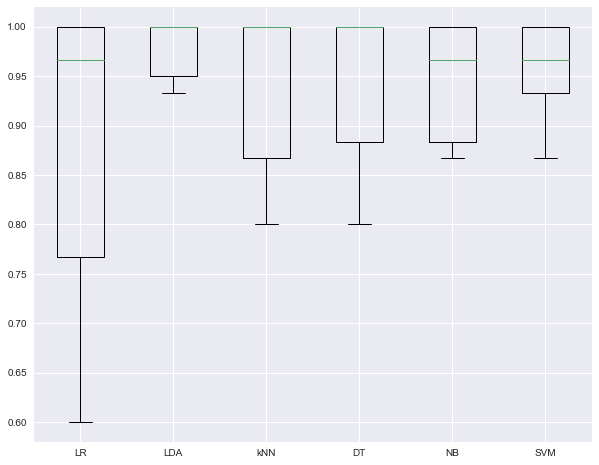

In [22]:
plt.figure(figsize = (10,8))
plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

In [30]:
test_size = 0.2
seed = 32
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [31]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [32]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
model.predict(X_test)

array([ 1.,  0.,  0.,  1.,  2.,  2.,  0.,  0.,  1.,  0.,  1.,  2.,  1.,
        1.,  2.,  2.,  1.,  2.,  1.,  0.,  0.,  2.,  2.,  0.,  0.,  1.,
        0.,  2.,  0.,  0.])

In [33]:
print (accuracy_score(Y_test, model.predict(X_test)))

1.0


Because the accuracy_score is 1.0 we don't have to improve the performance by hyperparameter optimisation.

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

In [34]:
confusion_matrix(Y_test, model.predict(X_test))

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]], dtype=int64)

A confusion matrix is used to visualize the performance of a classifier. So we can see that classifier correctly predicted all the labels.